# Aufgaben II
In diesem Notebook werden wir unser MNIST-Beispiel aus der Vorlesung verbessern. 
Für das Verständnis ist allgemeiner Umgang mit Python (Einheit I) und das Wissen aus den Vorlesungen
voraussetzung. Es ist also empfehlenswert, vorher diese Aufgaben gelöst zu haben!

Importiere numpy, sciikit-learn, pyplot, pandas. Aktiviere den inline-Modus von matplotlib
orientiere dich dabei an den Konventionen der Vorlesung / vorherigen Einheit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

%matplotlib inline

Kopiere den download-mnist code aus dem Vorlesungs-Notebook


In [2]:
def download_mnist():
    from six.moves import urllib
    from sklearn.datasets import fetch_mldata
    import os
    
    try:
        mnist = fetch_mldata('MNIST original')
        return mnist
    except urllib.error.HTTPError as ex:
        print("Could not download MNIST data from mldata.org, trying alternative...")

        # Alternative method to load MNIST, if mldata.org is down
        from scipy.io import loadmat
        mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
        mnist_path = "./mnist-original.mat"
        if not os.path.isfile(mnist_path):
            response = urllib.request.urlopen(mnist_alternative_url)
            with open(mnist_path, "wb") as f:
                content = response.read()
                f.write(content)
        mnist_raw = loadmat(mnist_path)
        mnist = {
            "data": mnist_raw["data"].T,
            "target": mnist_raw["label"][0],
            "COL_NAMES": ["label", "data"],
            "DESCR": "mldata.org dataset: mnist-original",
        }
        print("Success!")

        return mnist

Verwende diese Funktion und speichere das Ergebnis in die Variable "mnist" <br />

In [3]:
mnist = download_mnist()

Gebe diese Variable aus

In [5]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

## Trainingsdatensatz erstellen

Erstelle einen trainings und einen test-datensatz analog zur Vorlesung
Speichere die Ergebnisse in die Variablen X_train, X_test, y_train, y_test <br />
Verwende eine **Testsetgröße von 6000 Samples** und eine **Trainingsgröße von 1000 Samples** <br />
Schaue dir die Datenstrukturen ruhig noch einmal an!<br />
Speichere den gesamten Datensatz in X und y

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = mnist['data'].astype(np.float32)
y = mnist['target']

In [8]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     train_size=6/7, test_size=1/7,
                                                     random_state=101)

## Erstes Modell
- Trainiere eine LogisticRegression analog zur Vorlesung mit Standardparametern (außer dem **solver**->"lbfgs"!) und lasse dir den **classification report** und die **confusion matrix** für das Testset ausgeben. <br />
- Speichere das model in die Variable (first_model)<br />
- Speichere die vorhersagen in y_pred_train_first, y_test_train_first

In [9]:
from sklearn.linear_model import LogisticRegression
first_model = LogisticRegression(solver="lbfgs").fit(X_train, y_train)
y_pred_train_first = first_model.predict(X_train)
y_pred_test_first = first_model.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred_test_first))

0     1    2    3    4    5    6    7    8    9
0  931     0    3    0    1    4    6    0    5    1
1    0  1093    6    4    1    3    2    2   11    1
2    4    10  922    7    9    7   17   10   38    5
3    3     3   20  912    3   31    7    4   24    6
4    3     1    3    3  921    4    7    3    5   36
5    8     2    3   37   11  744   20    0   27   15
6   11     3    4    0   10   11  923    0    6    0
7    7     5   15    1   13    0    0  951    8   37
8    3    26   15   25    5   33    7    7  861   16
9   13     4    5   11   31    4    0   33   11  916

In [11]:
print(classification_report(y_true=y_test, y_pred=y_pred_test_first))

             precision    recall  f1-score   support

        0.0       0.95      0.98      0.96       951
        1.0       0.95      0.97      0.96      1123
        2.0       0.93      0.90      0.91      1029
        3.0       0.91      0.90      0.91      1013
        4.0       0.92      0.93      0.93       986
        5.0       0.88      0.86      0.87       867
        6.0       0.93      0.95      0.94       968
        7.0       0.94      0.92      0.93      1037
        8.0       0.86      0.86      0.86       998
        9.0       0.89      0.89      0.89      1028

avg / total       0.92      0.92      0.92     10000



## Preprocessing
In der Vorlesung hatten wir eine weitere Idee zum Verbessern des Klassifikators --> Das Data-Preprocessing. Das wollen wir einmal testen

**Kopiere** die Daten von X_test in die Variable X_binarized und bringe Sie in den Wertebereich zwischen **[0..1]**<br />
__Beachte__: Bitte kopiere explizit. Das geht nicht einfach mit X_binarized = X (Das würde nur eine Referenz zu der Variable schaffen)

In [260]:
X_binarized = np.copy(X) / 255.

Weiße allen Pixeln, deren Wert größer als ein Threshold (zBsp. 0.5) sind, den Wert 1. zu, sonst null <br />
Versuche dafür selbst einen Weg zu finden <br />
**Hinweis:** Damit schaffst Du dir selbst einen neuen Hyperparameter. Dieser kann auch optimiert werden (Was ist der beste Threshold?)

In [261]:
X_binarized[X_binarized > 0.5] = 1.
X_binarized[X_binarized <= 0.5] = 0.

Plotte einige der Bilder mit matplotlibs **imshow**.<br />
**Beachte**, dass Du den Feature-Vector in das Format (28, 28) bringen musst!

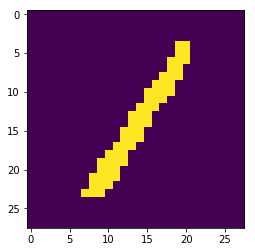

In [262]:
plt.imshow(X_binarized[10000].reshape(28, 28))

## Klassifikator 2
Trainiere einen neuen Klassifikator (second_model)<br />
mit den neuen Trainingsdaten, lasse dir analog zum ersten Model die Ergebnisse ausgeben. <br />
**Beachte**, dass du das neue Testset wieder in Trainings und Testdaten splitten musst!
Nenen diese Variablen X_test_binarized, X_train_binarized, y_test_binarized und y_train_binarized

In [ ]:
X_train_binarized, X_test_binarized, y_train_binarized, y_test_binarized  = train_test_split(X_binarized, y, 
                                                     train_size=6/7, test_size=1/7,
                                                     random_state=101)

In [ ]:
second_model = LogisticRegression(solver="lbfgs").fit(X_train_binarized, y_train_binarized)
y_pred_test_binarized = second_model.predict(X_test_binarized)
y_pred_train_binarized = second_model.predict(X_train_binarized)

In [ ]:
pd.DataFrame(confusion_matrix(y_true=y_test_binarized, y_pred=y_pred_test_binarized))

In [ ]:
print(classification_report(y_true=y_test_binarized, y_pred=y_pred_test_binarized))

Okay, das hat schonwieder fast nix gebracht...<br />
aber wir geben uns noch nicht geschlagen. 92% auf MNIST ist peinlich schlecht! <br />Machen wir also weiter! :-)

## Klassifikator 3
Zusatz: Versucht den Klassifikator irgendwie zu verbessern. Push LogisticRegression to its Maximum :-)<br />
Dazu könnt Ihr eine Reihe an Dingen testen, die wir in der VL angesprochen haben, aber einfach noch nicht durchgeführt haben u.A.:<br />
- Features hinzufügen (zBsp.: Quadrate oder einige features a la x1 * x2)
- Modellparameter tunen
- Datensatz erweitern:
    - Rauschen hinzufügen (zBsp. X + weißes Rauschen)
    - Bilder rotieren / verschieben
- Daten skalieren
- Kantendetektion (Fortgeschritten)
- Kombinationen aus all dem

<br>
<b>Tipps</b>:
Achtet dabei, dass ihr das erwartete Ergebnis nach den Operationen kommt. Schaut euch die Wertebereiche an (dtype, max, min,...)<br />
Plottet euch, wenn möglich, einige der Resultate. Ist das was Ihr seht, das was Ihr erwartet?<br />
Dies ist eine gute Übung um euch mit Python vertrauter zu machen.

In [4]:
# Dein Code hier :-)

## Klassifikator 4 / 5
Ensemble-Klassifikatoren wie random Forest sind sehr beliebte Machine Learning Modelle<br />
Beließ dich zum Thema DecisionTree / RandomForest / ExtraTrees <br />
Wende diese Modelle an, und versuche mit diesen Modellen die Erkennungsleistung zu steigern!<br />
Probiere nach belieben weitere Modelle und Verfahren.

In [307]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [ ]:
rand_fores = RandomForestClassifier(n_estimators=20, n_jobs=4).fit(X=X_train, y=y_train)

In [ ]:
y_pred_train_forest = rand_fores.predict(X_train)
y_pred_test_forest = rand_fores.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_test_forest))

In [311]:
tree = DecisionTreeClassifier().fit(X=X_train, y=y_train)

In [312]:
y_pred_train_tree = tree.predict(X_train)
y_pred_test_tree = tree.predict(X_test)

In [313]:
print(classification_report(y_true=y_test, y_pred=y_pred_test_tree))

             precision    recall  f1-score   support

        0.0       0.93      0.93      0.93       951
        1.0       0.94      0.95      0.95      1123
        2.0       0.88      0.87      0.88      1029
        3.0       0.84      0.85      0.84      1013
        4.0       0.86      0.87      0.86       986
        5.0       0.81      0.83      0.82       867
        6.0       0.90      0.92      0.91       968
        7.0       0.91      0.91      0.91      1037
        8.0       0.85      0.79      0.82       998
        9.0       0.83      0.83      0.83      1028

avg / total       0.88      0.88      0.88     10000



In [324]:
extra_tree = ExtraTreesClassifier(n_estimators=100).fit(X=X_train_binarized, y=y_train_binarized)

In [325]:
y_pred_train_extra = extra_tree.predict(X_train_binarized)
y_pred_test_extra = extra_tree.predict(X_test_binarized)

In [326]:
print(classification_report(y_true=y_test_binarized, y_pred=y_pred_test_extra))

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98       951
        1.0       0.99      0.99      0.99      1123
        2.0       0.96      0.98      0.97      1029
        3.0       0.98      0.96      0.97      1013
        4.0       0.98      0.97      0.97       986
        5.0       0.96      0.98      0.97       867
        6.0       0.98      0.98      0.98       968
        7.0       0.98      0.96      0.97      1037
        8.0       0.97      0.97      0.97       998
        9.0       0.96      0.97      0.97      1028

avg / total       0.97      0.97      0.97     10000

